# **7.5 Support Vector Machines (SVM):**

Algoritmo de clasificación y regresión

In [1]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

<font size = 5> 

KNN parte de **datos etiquetados** e intenta encontrar un **hiperplano** en el espacio vectorial que separe las clases. Se busca el hiperplano que maximice la distancia a los datos mas cercanos de cada clase. A estos datos se les conoce como los *Support Vectors*.

<center><img src="./imgs/svm.png" width='60%' height='60%'>

<font size = 5> 

Su aplicación en SKLEARN es trivial, usamos *'sklearn.svm.SVC()'*

**Este clasificador usa el parámetro importante de 'kernel' que indica el tipo de hiperplano que buscará**



In [3]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.svm import SVC
svc = SVC()
svc.fit(X, y)

SVC()

In [6]:
svc.predict([[1.8]])

array([1])

<font size = 5> 

**Por defecto utiliza el kernel RBF (Radial Basis Function), que funciona bien en la mayoría de situaciones pero es sensible al parámetro 'Gamma'. Por esto es habitual buscar entre varios parámetros gamma para encontrar el óptimo**

<font size = 5> 

**Ventajas:**
* Efectivo en datasets con un elevado número de dimensiones (características).
* Resistente a overfitting
* Existe una versión, SVR, preparada para hacer regresión.

**Desventajas:**
* Sensible a los parámetros como el kernel seleccionado y el Gamma,lo que lleva habitualmente a que se hagan búsquedas exploratorias de estos parámetros.
* Es más computacionalmente intensivo que otros métodos.
* Las decisiones que dan de clasificación son categóricas y no probabilísticas.

<font size = 5> 

**Diferencias con los KNN**:
* Los SVM pueden usar datasets con número de características muy amplio, mientras que los KNN puede verse afectados por la malición de la dimensionalidad,por la que las distancias se vuelven menos representativaa a mayor número de componentes.
* Robustez en los SVM permite trabajar de manera efectiva cn datasets que no han podido ser depurados,
* Al busca hiper planos, los SVC son de manera natural resistentes a problema de equilibrado de etiquetas

## Ejemplo de representación gráfica:

In [2]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # Cogemos solo 2 caracteristicas
y = iris.target

In [6]:
iris.feature_names[:2]

['sepal length (cm)', 'sepal width (cm)']

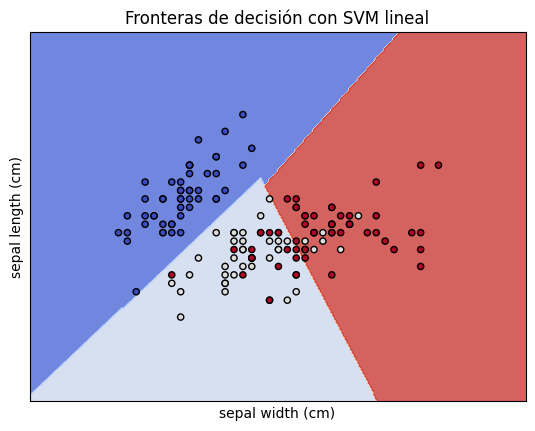

In [7]:
model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Fronteras de decisión con SVM lineal')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[0])
ax.set_xlabel(iris.feature_names[1])
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()